# Част III: Увод в Невронните Мрежи



### ЛУ10: Увод в numpy

В основата си невронните мрежи са множество взаимодействщи набори от матрици. Входните ни данни трябва да са матрица, изходните данни идват под формата на матрица, разнообразните процеси в самата мрежа са различни видове матрични операции. Numpy е библиотека за Python, целяща именно да позволи лесна и ефикасна работа с матрици. Ненапразно популярните библиотеки за невронни мрежи в Python (tensorflow, keras, pytorch, cupy) имат обекти и синтаксис заети от numpy. Макар самата библиотека вече да не се използва в разработката на индустриални алгоритми (основно заради неспособността си да разпределя изчисленията си между няколко процесора), научавайки я, читателят ще може изключително лесно да разбере споменатите по-горе библиотеки (като cupy е почти точно копие на numpy с възможност именно за разпределяне на изчисленията).

За по-задълбочен увод в библиотеката, както и в pandas, matplotlib и scikit-learn, препоръчваме книгата [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) от Джейк ван дер Плас.


In [4]:
import numpy as np

### Матрици в Numpy

Матриците в numpy са ndarray обекти. Те притежават измерения и съдържат обекти от числен вид: или само цели числа, или само числа с плаваща запетая (десетични дроби). Определена матрица може да има неограничен брой измерения, стига те да могат да поберат всички елементи на матрицата. Умноженият брой на измеренията трябва да съвпада с броя елементи в матрицата.

In [18]:
x = list(range(6))
x = np.array(x)
print(x)
print(type(x))

[0 1 2 3 4 5]
<class 'numpy.ndarray'>


Основен начин да получим информация за дадена матрица е чрез нейната форма. В невронните мрежи обичкновено се работи с едноизмерни (вектори) и двуизмерни матрици.

In [19]:
x.shape

(6,)

Методът reshape позволява да променим формата на дадена матрица.

In [20]:
x.reshape(2,3)

array([[0, 1, 2],
       [3, 4, 5]])

In [21]:
x_3d = x.reshape(2,3,1) #триизмерна матрица
x_3d

array([[[0],
        [1],
        [2]],

       [[3],
        [4],
        [5]]])

Подобно на pandas серия, дадена матрица може да съдържа обекти от един-единствен вид.

In [22]:
x.dtype

dtype('int32')

### Излъчване (broadcasting) и матрична математика

Ако съберем матрица с едно число, то бива прибавено към всеки елемент на матрицата. Този процес се нарича излъчване или broadcasting. Този процес може да се извърши и между матрици, стига те да отговарят на [критериите за излъчване](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html).


In [23]:
x + 1

array([1, 2, 3, 4, 5, 6])

In [24]:
x * 2

array([ 0,  2,  4,  6,  8, 10])

Важно е да се прави разлика между едноизмерна матрица и двуизмерна такава, където второто измерение е 1. Например:

In [25]:
y = x.reshape(6,1)
x.shape, y.shape

((6,), (6, 1))

In [26]:
x, y

(array([0, 1, 2, 3, 4, 5]),
 array([[0],
        [1],
        [2],
        [3],
        [4],
        [5]]))

Когато събираме матрици с различни измерения, резултатът е излъчване на стойностите им спрямо едно-друго.

In [158]:
z = x + y
z

array([[ 0,  1,  2,  3,  4,  5],
       [ 1,  2,  3,  4,  5,  6],
       [ 2,  3,  4,  5,  6,  7],
       [ 3,  4,  5,  6,  7,  8],
       [ 4,  5,  6,  7,  8,  9],
       [ 5,  6,  7,  8,  9, 10]])

### Индексиране в Numpy

Numpy матриците също могат да бъдат индексирани според измеренията си.

In [161]:
x[2]

2

In [165]:
y[4, 0]

4

In [166]:
z[2,2]

4

In [171]:
z[2]

array([2, 3, 4, 5, 6, 7])

In [173]:
x_3d[1, 1, 0]

4

### Генериране на масиви

Numpy предоставя сериозен набор за автоматично съставяне на матрици:

 - np.linspace предоставя равномерно разпределени дроби в даден диапазон;
 - np.random.normal съставя произволен набор с нормална дистрибуция;
 - np.random.randint генерира произволни цели числа в даден диапазон;
 - np.random.random връща набор дроби между 0 и 1;
 - np.zeros и np.ones създават масив с дадена форма, изпълнен съответно с нули или единици.

Text(0.5, 1.0, 'Simple linear relationship')

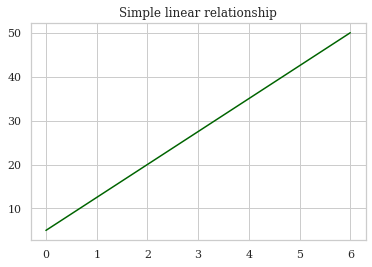

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(
    font='serif',
    style = 'whitegrid',
)

x = np.linspace(
    start = 0,
    stop = 6,
    num = 100
)

y = np.linspace(
    start = 5,
    stop = 50,
    num = 100
)

plt.plot(x, y, c='darkgreen')
_ = plt.title('Simple linear relationship')

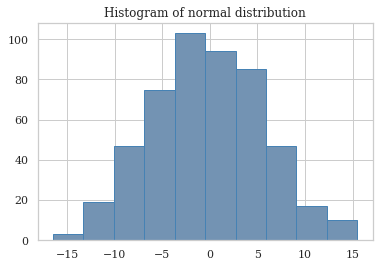

In [78]:
normal = np.random.normal(
    loc = 0,
    scale = 6,
    size = 500
)

plt.hist(
    normal, 
    color = '#7393B3', 
    edgecolor = '#4682B4'
)

_ = plt.title('Histogram of normal distribution')

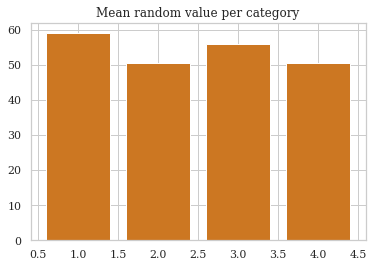

In [106]:
import pandas as pd

random_categories = np.random.randint(
    low = 1,
    high = 5,
    size = 200
)

random_values = np.random.random(size = 200)
random_values = random_values * 100 # generating a random sample between 0 and 100

random_df = pd.DataFrame({
    'category': random_categories,
    'value': random_values
})


plt.bar(
    x = random_df.category.unique(),
    height = random_df.groupby('category').value.mean(),
    color = '#CC7722'
)

_ = plt.title('Mean random value per category')

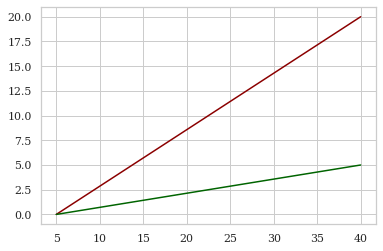

In [ ]:
# създаваме по 50 двойки координати за двата вектора
Ax = np.linspace(5, 40, 50)
Ay = np.linspace(0, 20, 50)
Bx = np.linspace(5, 40, 50)
By = np.linspace(0, 5, 50)

A_plot = plt.plot(Ax, Ay, color = 'darkred')
B_plot = plt.plot(Bx, By, color = 'darkgreen')

In [ ]:
A = np.stack((Ax, Ay)) #наслагваме двата набора координати, за да получим двуизмерен масив
B = np.stack((Bx, By))
A.shape

(2, 50)

In [ ]:
C = (A+B)/2 #получаваме средната стойност на двата масива
C.shape

(2, 50)

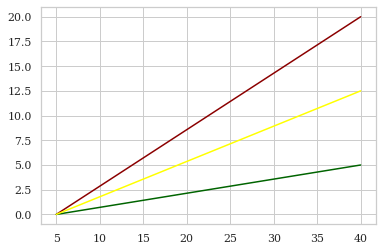

In [ ]:
A_plot = plt.plot(Ax, Ay, color = 'darkred')
B_plot = plt.plot(Bx, By, color = 'darkgreen')
C_plot = plt.plot(C[0], C[1], color = 'yellow')

### Транспониране
Освен събиране, изваждане, делене и умножение, матриците имат и други способности, като транспониране, точков продукт, кръстосан продукт и много други.

При транспониране обръщаме измеренията на дадена матрица:

In [5]:
X = np.arange(0,6,1).reshape(2,3)
X

array([[0, 1, 2],
       [3, 4, 5]])

In [15]:
Y = X.transpose()
Y

array([[0, 3],
       [1, 4],
       [2, 5]])

### Точков продукт
Точковият продукт е операция, често срещана в невронните мрежи. Numpy ни позволява лесно да извършваме такива операции, но е хубаво да ги разберем. За да получим точковия продукт на две матрици, второто измерение на първата трябва да съответства на първото измерение на втората. Резултатът притежава първото измерение на първата и второто измерение на втората матрица. Това постигаме като събираме умноженията на различни елементи. Например, в долното уравнение X[0, 0] = X[0, 0] * Y[0, 0] + X[0, 1] * Y[1, 0] + X[0, 2] * Y[2, 0] = 0 * 0 + 1 * 0.7 + 2 * 1.4 = 3.5.

In [16]:
Y = Y * .7
Y

array([[0. , 2.1],
       [0.7, 2.8],
       [1.4, 3.5]])

In [17]:
Z = X.dot(Y)
Z

array([[ 3.5,  9.8],
       [ 9.8, 35. ]])

### Задача

Създайте:

- Едноизмерен numpy масив пълен единици и имащ дължина 15;
- Прибавете към него едноизмерен масив със стойности между 0 и 14 и имащ същите измерения;
- Променете измеренията на втория масив на (15, 1);
- Умножете двата масива;
- Получете точковия продукт на двата масива. Опитайте да разпишете формулата за получаване продукта.
- Създайте графика, където за х-ос имаме 100 линейно разпределени стойности между 0 и 15, а y-оста е косинусова функция на x.